<a href="https://colab.research.google.com/github/rskadikar/USC-TAC359-F25-hw2-rskadikar/blob/main/hw2_359.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

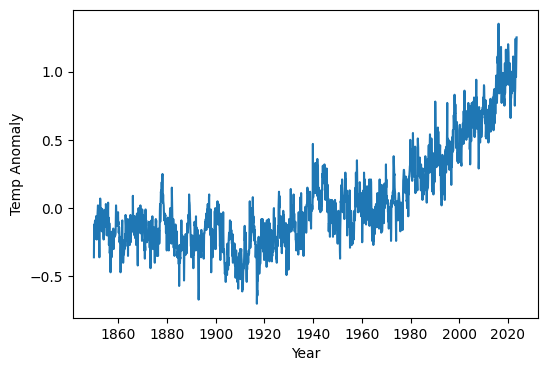

[[-0.36]
 [-0.12]
 [-0.23]
 ...
 [ 1.07]
 [ 1.13]
 [ 1.25]]
[[0.16585365]
 [0.28292683]
 [0.22926828]
 ...
 [0.86341465]
 [0.8926829 ]
 [0.95121956]]
Shape of X: (2059, 24)
[[0.16585365 0.28292683 0.22926828 ... 0.32682928 0.3219512  0.33170733]
 [0.28292683 0.22926828 0.24878049 ... 0.3219512  0.33170733 0.27317074]
 [0.22926828 0.24878049 0.24878049 ... 0.33170733 0.27317074 0.30731708]
 ...
 [0.7365854  0.7609756  0.7902439  ... 0.8341464  0.9463415  0.81951225]
 [0.7609756  0.7902439  0.7512195  ... 0.9463415  0.81951225 0.8097561 ]
 [0.7902439  0.7512195  0.7902439  ... 0.81951225 0.8097561  0.86341465]]
Shape of y: (2059,)
[0.27317074 0.30731708 0.2195122  ... 0.8097561  0.86341465 0.8926829 ]


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0501
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 13/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 14/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 15/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 16/20
65

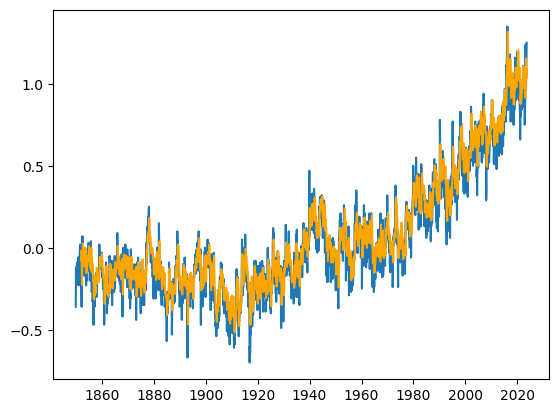

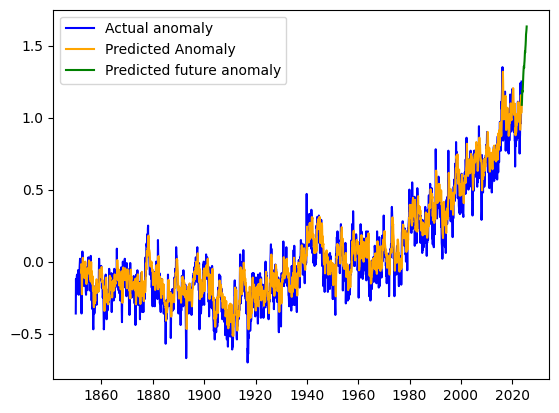

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math

# import data and convert year to datetime
df = pd.read_csv('temperature.csv')
df['Year'] = pd.to_datetime(df['Year'])

# plot temperature anomaly vs year
plt.figure(figsize=[6, 4])
plt.plot(df['Year'], df['Anomaly'])
plt.xlabel('Year')
plt.ylabel('Temp Anomaly')
plt.show()

# save the temp anomaly into a 2D array
temp = df['Anomaly'].values.astype('float32').reshape(-1, 1)
print(temp)

# scale the array using minmaxscaler
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(temp)
print(scaled_temp)

# convert the temperatures into sequences of n monthly temperatures
# that are shifted by one month in each row of the array
def to_sequences(temp, seq_size):
  X = []
  y = []

  for i in range(len(temp) - seq_size - 1):
    window = temp[i:(i+seq_size), 0]
    X.append(window)
    y.append(temp[i+seq_size, 0])

  return np.array(X), np.array(y)

X, y = to_sequences(scaled_temp, 24)
print("Shape of X:", X.shape)
print(X)
print("Shape of y:", y.shape)
print(y)

model = Sequential()
model.add(Input(shape = (24, )))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
print(model.summary())

# train model
model.fit(X, y, verbose = 1, epochs = 20)

# predict next month's temperature, & inverse scale temperature
y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)

# score predictions
score = math.sqrt(mean_squared_error(scaler.inverse_transform(y.reshape(-1, 1)), y_pred[:, 0]))
print("Score:", score)

# plot predictions
plt.plot(df['Year'], scaler.inverse_transform(scaled_temp))
plt.plot(df['Year'][-len(y_pred):], y_pred, color = 'orange')

# predict the temperature for the next 24 months into the future
current = X[-1].copy()
future_pred = []

for i in range(24):
    next_pred = model.predict(current.reshape(1, -1))[0, 0]
    future_pred.append(next_pred)
    current = np.append(current[1:], next_pred)
future_pred = np.array(future_pred).reshape(-1, 1)
future_dates = pd.date_range(start= df['Year'].iloc[-1] + pd.DateOffset(months=1), periods=24, freq='MS')

# plot with predicted future anomaly
plt.figure()
plt.plot(df['Year'], scaler.inverse_transform(scaled_temp), label = 'Actual anomaly', color = 'blue')
plt.plot(df['Year'][-len(y_pred):], y_pred, label = 'Predicted Anomaly', color = 'orange')
plt.plot(future_dates, scaler.inverse_transform(future_pred), label='Predicted future anomaly', color='green')
plt.legend()
plt.show()

